In [1]:
!pip install pysus
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import seaborn as sb
from pysus.online_data.SIH import download
from datetime import datetime

In [4]:
# variaveis que usarei para analise ( apenas para uma visualização melhor do df )
vars = ['N_AIH','MES','ANO','IDADE','SEXO','UF_ZI','NUM_FILHOS','INSTRU','MORTE','CID_MORTE','DIAS_PERM','DIAG_PRINC','DIAG_SECUN','DT_INTER','ANO_CMPT','MES_CMPT','MARCA_UTI','UTI_MES_TO','INFEHOPS']

meses = [1,2,3,4,5,6,7,8,9,10,11,12]
estado = 'es'
anos = [2021]
aux={}

In [5]:
# faz o download dos dados
for ano in anos:
  for mes in meses:
      aux[mes, ano] = pd.read_parquet(download(estado, ano, mes))
      print(f"O Arquivo do Mês {mes} do Ano {ano} do Estado do {estado.upper()} foi Baixado!")

O Arquivo do Mês 1 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 2 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 3 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 4 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 5 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 6 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 7 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 8 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 9 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 10 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 11 do Ano 2021 do Estado do ES foi Baixado!
O Arquivo do Mês 12 do Ano 2021 do Estado do ES foi Baixado!


In [57]:
# concatena o dicionario em um DataFrame
sih_es = pd.concat({k:pd.DataFrame.from_dict(v) for k, v in aux.items()}, axis=0).reset_index()
sih_es.shape

(265471, 116)

In [58]:
# visualização da tabela
sih_es

,level_0,level_1,level_2,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,1,2021,0,320000,2021,01,01,27265891000164,3221101224902,1,...,,0,0,0,0,0,0,0,0,0
1,1,2021,1,320000,2021,01,01,27265891000164,3221101224913,1,...,,0,0,0,0,0,0,0,0,0
2,1,2021,2,320000,2021,01,01,27265891000164,3221101224924,1,...,,0,0,0,0,0,0,0,0,0
3,1,2021,3,320000,2021,01,01,27265891000164,3221101224935,1,...,,0,0,0,0,0,0,0,0,0
4,1,2021,4,320000,2021,01,01,27265891000164,3221101232459,1,...,,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265466,12,2021,20318,320520,2021,12,01,27165554000448,3221101206708,1,...,,0,0,0,0,0,0,0,0,0
265467,12,2021,20319,320520,2021,12,01,27165554000448,3221101206741,1,...,,0,0,0,0,0,0,0,0,0
265468,12,2021,20320,320520,2021,12,01,27165554000448,3221101206752,1,...,,0,0,0,0,0,0,0,0,0
265469,12,2021,20321,320520,2021,12,01,27165554000448,3221101206763,1,...,,0,0,0,0,0,0,0,0,0


In [59]:
# atribuindo as 3 primeiras colunas nomes
sih_es = sih_es.rename(columns={'level_0':'MES', 'level_1':'ANO'})
sih_es.shape

(265471, 116)

In [60]:
# filtra para ter somente as cids de código que começa com F
sih_es = sih_es[sih_es['DIAG_PRINC'].str.contains('F')]
sih_es.shape

(3769, 116)

In [61]:
#visualização da tabela pós filtração
sih_es

,MES,ANO,level_2,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
26,1,2021,26,320000,2021,01,05,27080605000862,3220103004327,5,...,,0,0,0,0,0,0,0,0,0
27,1,2021,27,320000,2021,01,05,27080605000862,3220103004338,5,...,,0,0,0,0,0,0,0,0,0
28,1,2021,28,320000,2021,01,05,27080605000862,3220103004349,5,...,,0,0,0,0,0,0,0,0,0
29,1,2021,29,320000,2021,01,05,27080605000862,3220103004350,5,...,,0,0,0,0,0,0,0,0,0
30,1,2021,30,320000,2021,01,05,27080605000862,3220103004360,5,...,,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265231,12,2021,20083,320506,2021,12,03,27443803000177,3221101181474,1,...,,0,0,0,0,0,0,0,0,0
265244,12,2021,20096,320506,2021,12,03,27443803000177,3221101180540,1,...,,0,0,0,0,0,0,0,0,0
265317,12,2021,20169,320506,2021,12,03,27443803000177,3221101181694,1,...,,0,0,0,0,0,0,0,0,0
265325,12,2021,20177,320506,2021,12,03,27443803000177,3221101181705,1,...,,0,0,0,0,0,0,0,0,0


In [62]:
# visualizaçao das variaveis que não possuem nenhum valor
# sih_es['NUM_FILHOS'].unique(), sih_es['INSTRU'].unique(), sih_es['CID_MORTE'].unique(), sih_es['DIAG_SECUN'].unique()

In [63]:
# excluindo variaveis que não possuem valores 
# sih_es.drop(['NUM_FILHOS', 'INSTRU', 'CID_MORTE','DIAG_SECUN'], axis=1, inplace=True)

In [64]:
# filtra as colunas que eu desejo
sih_es = sih_es.filter(vars)
sih_es.shape

(3769, 18)

In [65]:
# trocando os sexos
sexo={'1':'Masculino','3':'Feminino'}
sih_es['SEXO'] = sih_es['SEXO'].replace(sexo)

In [66]:
sih_es

,N_AIH,MES,ANO,IDADE,SEXO,UF_ZI,NUM_FILHOS,INSTRU,MORTE,CID_MORTE,DIAS_PERM,DIAG_PRINC,DIAG_SECUN,DT_INTER,ANO_CMPT,MES_CMPT,MARCA_UTI,UTI_MES_TO
26,3220103004327,1,2021,40,Masculino,320000,0,0,0,0000,26,F312,0000,20201222,2021,01,00,0
27,3220103004338,1,2021,39,Feminino,320000,0,0,0,0000,6,F315,0000,20201221,2021,01,00,0
28,3220103004349,1,2021,60,Masculino,320000,0,0,0,0000,25,F318,0000,20201219,2021,01,00,0
29,3220103004350,1,2021,36,Masculino,320000,0,0,0,0000,26,F208,0000,20201219,2021,01,00,0
30,3220103004360,1,2021,49,Feminino,320000,0,0,0,0000,7,F316,0000,20201218,2021,01,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265231,3221101181474,12,2021,35,Feminino,320506,0,0,0,0000,11,F190,0000,20211216,2021,12,00,0
265244,3221101180540,12,2021,58,Masculino,320506,0,0,0,0000,7,F100,0000,20211203,2021,12,00,0
265317,3221101181694,12,2021,69,Masculino,320506,0,0,0,0000,13,F102,0000,20211216,2021,12,00,0
265325,3221101181705,12,2021,34,Masculino,320506,0,0,0,0000,12,F142,0000,20211217,2021,12,00,0


In [67]:
# descobrindo se possui valores NaN
sih_es.isnull().sum()

N_AIH         0
MES           0
ANO           0
IDADE         0
SEXO          0
UF_ZI         0
NUM_FILHOS    0
INSTRU        0
MORTE         0
CID_MORTE     0
DIAS_PERM     0
DIAG_PRINC    0
DIAG_SECUN    0
DT_INTER      0
ANO_CMPT      0
MES_CMPT      0
MARCA_UTI     0
UTI_MES_TO    0
dtype: int64

<Axes: xlabel='SEXO'>

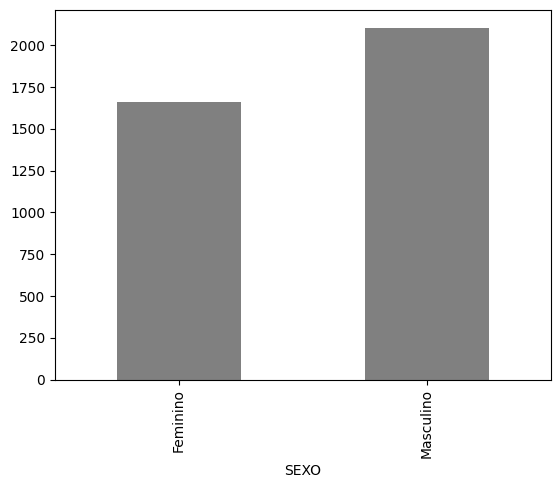

In [68]:
# grafico de barras dos sexos dos pacientes
grupo_sexo = sih_es.groupby(['SEXO']).size()
grupo_sexo.plot.bar(color='gray')

In [69]:
# agrupando as cids em um dataframe
grupo_cids = sih_es.groupby(['DIAG_PRINC']).size()
gc = pd.DataFrame(grupo_cids)
gc = gc.rename(columns={"DIAG_PRINC":'CID', 0:'QUANT'})

In [70]:
# filtrando para as cids que possuem quantidade maiores que 500
gc_maior = gc[(gc.QUANT >= 500)]
gc_maior = gc_maior.sort_values(['QUANT'], ascending=False)
# filtrando para cids que possuem quantidade menor que 500 e maiores que 200
gc_entre = gc[(gc.QUANT <= 500) & (gc.QUANT >= 200)]
gc_entre = gc_entre.sort_values(['QUANT'], ascending=False)

<Axes: xlabel='DIAG_PRINC'>

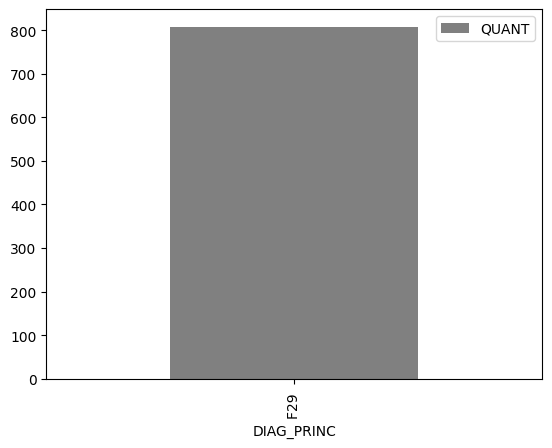

In [71]:
# visualização da tabela
gc_maior
# grafico
gc_maior.plot.bar(color='gray')

<Axes: xlabel='DIAG_PRINC'>

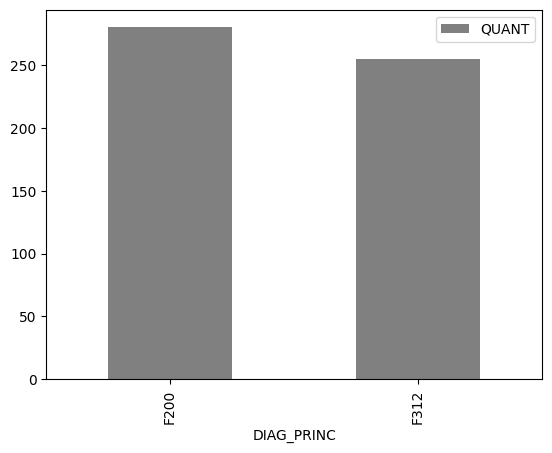

In [72]:
# visu da tabela
gc_entre
# tabela
gc_entre.plot.bar(color='gray')

In [92]:
# concatenando as colunas em uma coluna DATA 
sih_es['DATA'] = sih_es.apply(lambda x: '%s-%s' % (x['ANO'], x['MES']), axis=1)
# removendo as colunas MES e ANO 
sih_es.drop(['MES', 'ANO'], axis=1, inplace=True)
# convertendo o tipo da coluna de String para Date
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
sih_es.DATA = sih_es.DATA.apply(dateparse)

KeyError: ignored

In [90]:
# criação da tabela separada pra serie temporal 
temp_series = sih_es['DATA']
temp_series = pd.DataFrame(temp_series).reset_index()
temp_series = temp_series.join(sih_es['SEXO'])
aux = temp_series.loc[(temp_series['SEXO'] == 'Feminino')]
temp_series=temp_series.drop(aux.index)


In [91]:
temp_series

,index,DATA,SEXO
0,26,2021-01-01,NaN
1,27,2021-01-01,NaN
2,28,2021-01-01,NaN
3,29,2021-01-01,NaN
4,30,2021-01-01,NaN
...,...,...,...
3763,265230,2021-12-01,NaN
3764,265231,2021-12-01,NaN
3765,265244,2021-12-01,NaN
3766,265317,2021-12-01,NaN


In [85]:
temp_series[1]

KeyError: ignored